C:\Users\18117\AppData\Local\Temp\ipykernel_30852\628132315.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\18117\AppData\Local\Temp\ipykernel_30852\628132315.py:67: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


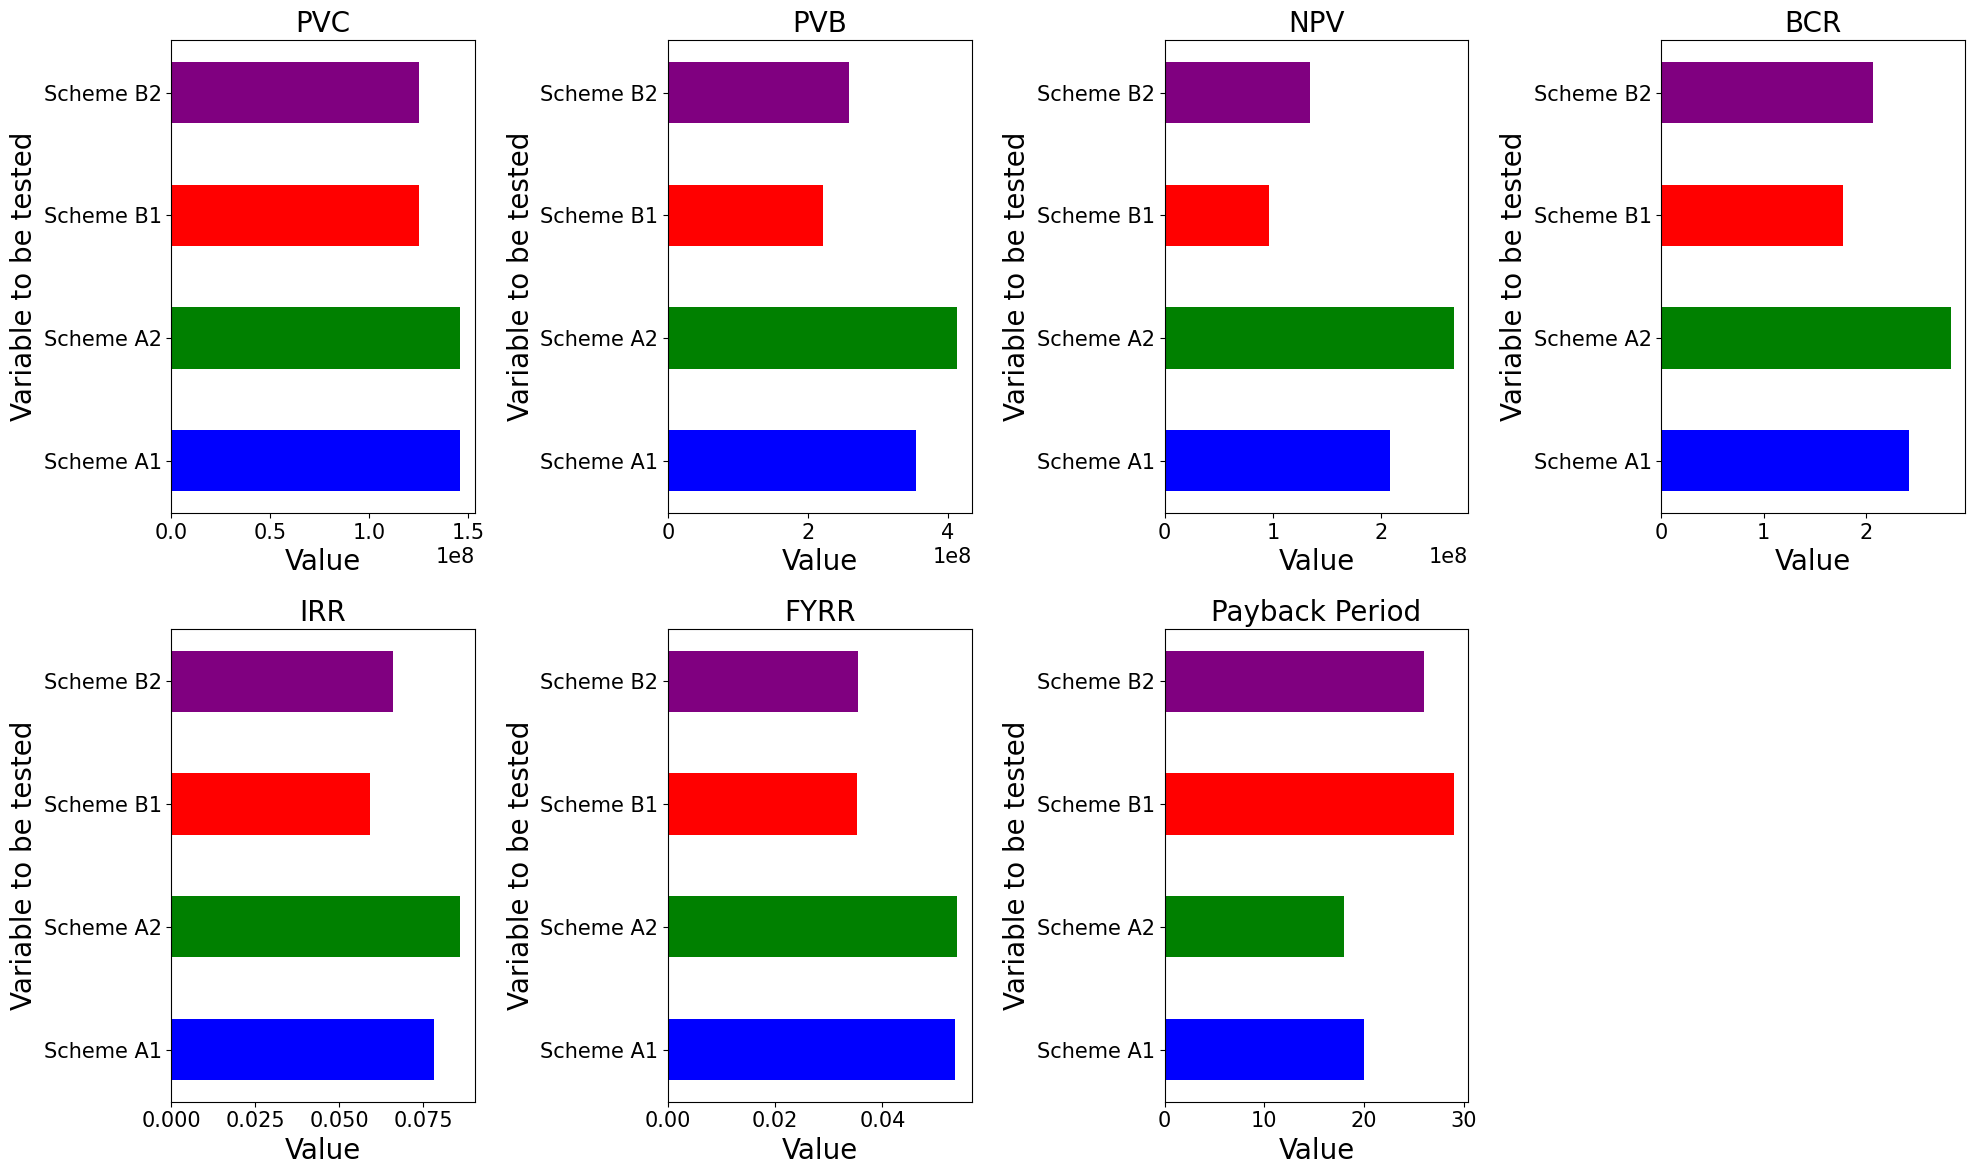

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from eco import TransportationScheme
plt.rcParams.update({'font.size': 15})
SchemeA1 = TransportationScheme('voc.csv')
SchemeA2 = TransportationScheme('voc.csv', growth_rate=0.02)
schemeB1 = TransportationScheme('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000)
schemeB2 = TransportationScheme('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000, growth_rate = 0.02)
SchemeA1.get_things_done()
SchemeA2.get_things_done()
schemeB1.get_things_done()
schemeB2.get_things_done()

resultA1 = SchemeA1.financial_metrics
resultA2 = SchemeA2.financial_metrics
resultB1 = schemeB1.financial_metrics
resultB2 = schemeB2.financial_metrics

result_dict = {'Scheme A1': resultA1, 'Scheme A2': resultA2, 'Scheme B1': resultB1, 'Scheme B2': resultB2}

def plot_bar_chart(result_dict):
    # 转换数据以适应图形绘制

    # 转换数据以适应图形绘制
    first_key = next(iter(result_dict))
    metrics = list(result_dict[first_key].keys())  # 指标名称
    values = {metric: [] for metric in metrics}  # 按指标组织的值

    for scheme in result_dict.values():
        for metric, value in scheme.items():
            if value == 'N/A':
                values[metric].append(0)
            else:
                values[metric].append(value)

    # 计算行列数，适应七个指标
    rows = 2
    columns = len(metrics) // rows + (len(metrics) % rows > 0)  # 确保所有图形都能被正确放置

    # 绘制柱状图
    fig, axs = plt.subplots(rows, columns, figsize=(20, 12), constrained_layout=True)

    for i, metric in enumerate(metrics):
        # 当只有一行或一列时，axs 可能不是二维数组，这需要特别处理
        if rows * columns == 1:
            ax = axs
        elif rows == 1:  # 仅一行
            ax = axs[i]
        elif columns == 1:  # 仅一列
            ax = axs[i]
        else:  # 多行多列
            ax = axs[i // columns, i % columns]

        ax.barh(list(result_dict.keys()), values[metric], color=['blue', 'green', 'red', 'purple'], height=0.5)
        ax.set_title(metric, fontsize=20)  # 调整了字体大小
        ax.set_ylabel('Variable to be tested', fontsize=20)
        ax.set_xlabel('Value', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)

    # 隐藏多余的子图位置
    if len(metrics) % (rows * columns) != 0:  # 如果指标数不能被子图总数整除
        for idx in range(len(metrics), rows * columns):
            fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.show()


plot_bar_chart(result_dict)




如果是汽油呢？

Scheme A1 {'PVC': 145943436.49927253, 'PVB': 282531600.2649994, 'NPV': 136588163.76572686, 'BCR': 1.9358979550026405, 'IRR': 0.06405506825677665, 'FYRR': 0.04154660588485228, 'Payback Period': 26}
Scheme A2 {'PVC': 145943436.49927253, 'PVB': 331692011.40602934, 'NPV': 185748574.90675682, 'BCR': 2.2727436009613404, 'IRR': 0.07155861991906143, 'FYRR': 0.04204750696725803, 'Payback Period': 23}
Scheme B1 {'PVC': 124920970.74927253, 'PVB': 112595478.01169235, 'NPV': -12325492.73758018, 'BCR': 0.9013336778952948, 'IRR': 0.03019405409823661, 'FYRR': 0.014443754610682348, 'Payback Period': 'N/A'}
Scheme B2 {'PVC': 124920970.74927253, 'PVB': 134476224.89135, 'NPV': 9555254.142077476, 'BCR': 1.0764903929641703, 'IRR': 0.03640988040295179, 'FYRR': 0.014907233840899722, 'Payback Period': 56}


C:\Users\18117\AppData\Local\Temp\ipykernel_30852\628132315.py:67: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


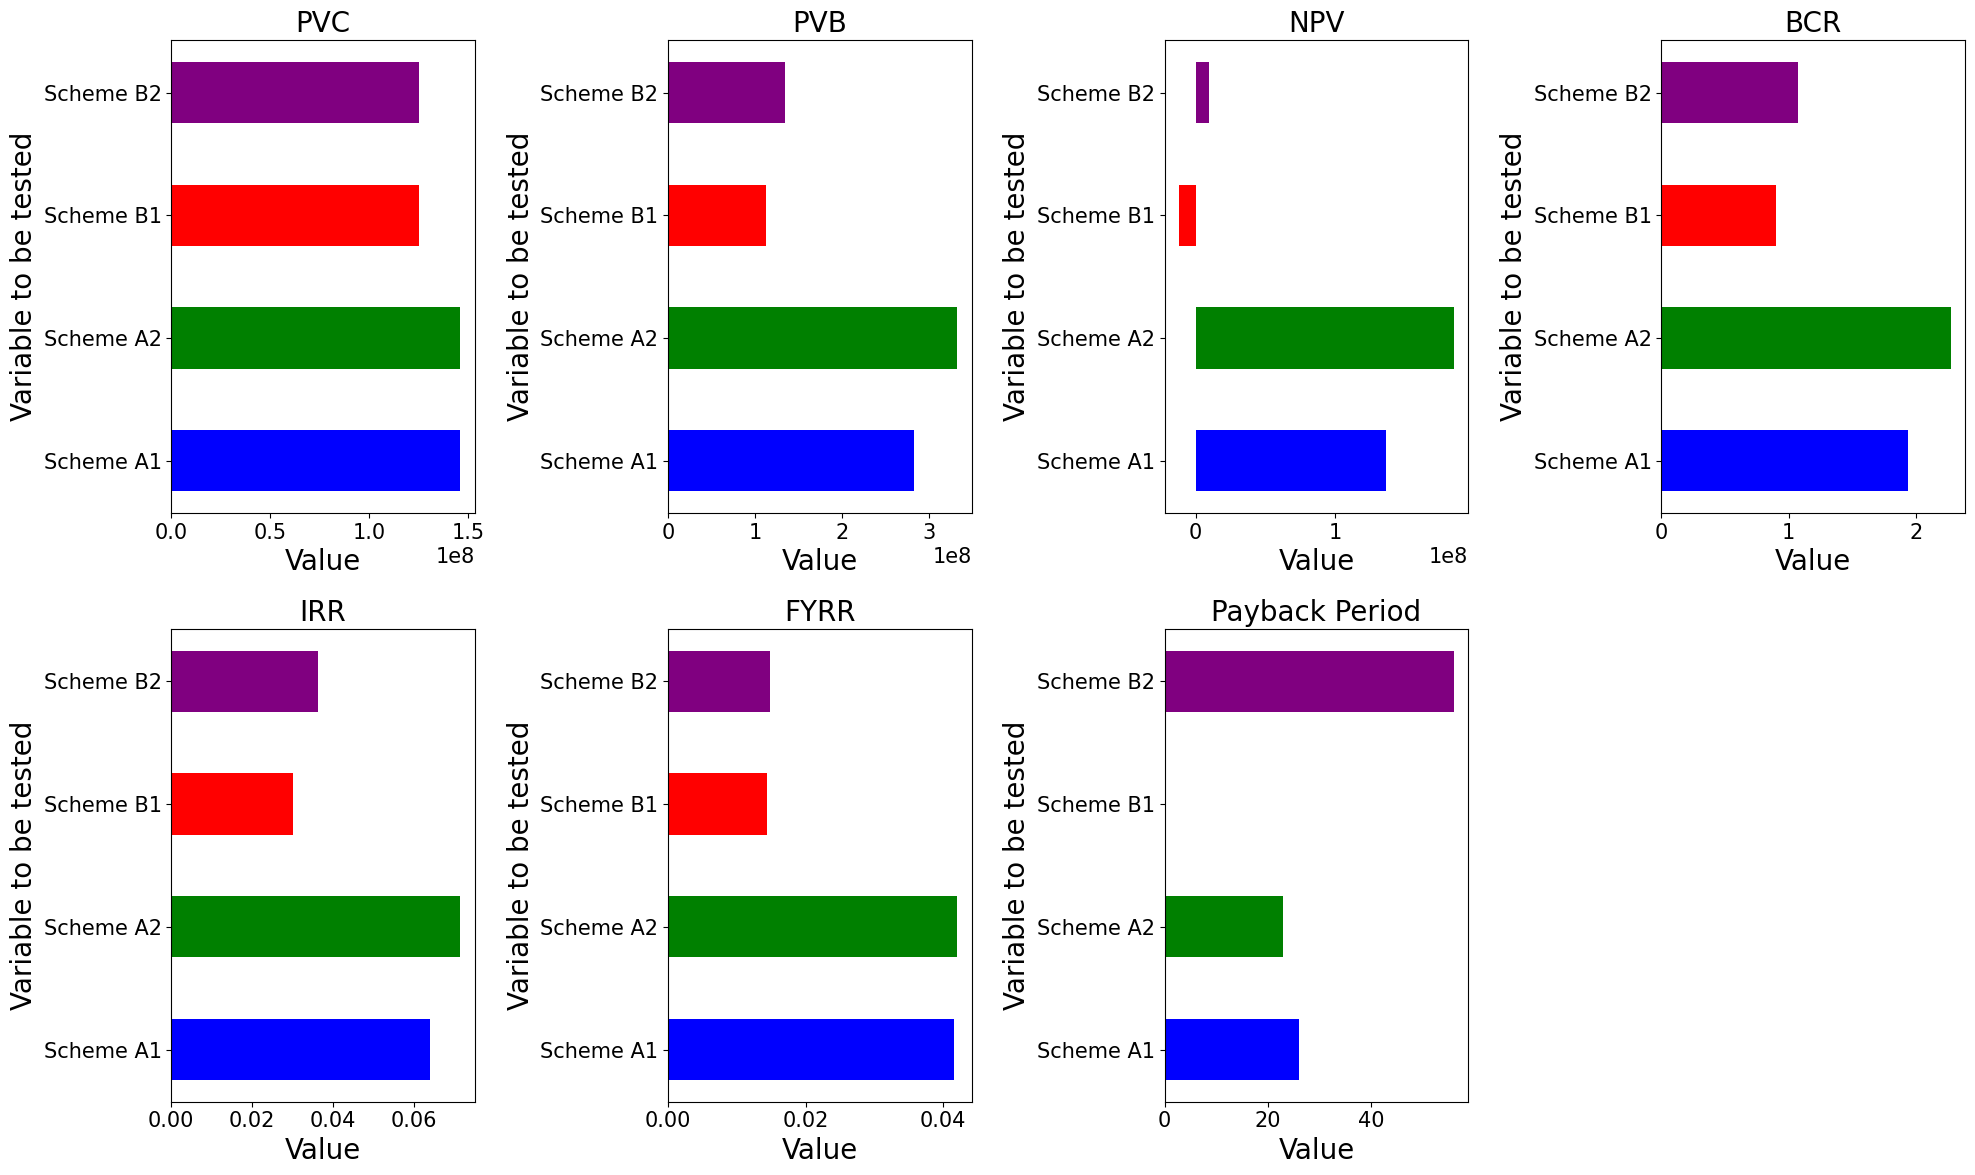

In [6]:
from eco_petrol import EcoPetrol
SchemeA1 = EcoPetrol('voc.csv')
SchemeA2 = EcoPetrol('voc.csv', growth_rate=0.02)
schemeB1 = EcoPetrol('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000)
schemeB2 = EcoPetrol('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000, growth_rate = 0.02)
SchemeA1.get_things_done()
SchemeA2.get_things_done()
schemeB1.get_things_done()
schemeB2.get_things_done()
resultA1 = SchemeA1.financial_metrics
resultA2 = SchemeA2.financial_metrics
resultB1 = schemeB1.financial_metrics
resultB2 = schemeB2.financial_metrics
result_dict = {'Scheme A1': resultA1, 'Scheme A2': resultA2, 'Scheme B1': resultB1, 'Scheme B2': resultB2}
for key, value in result_dict.items():
    print(key, value)
plot_bar_chart(result_dict)

折线图

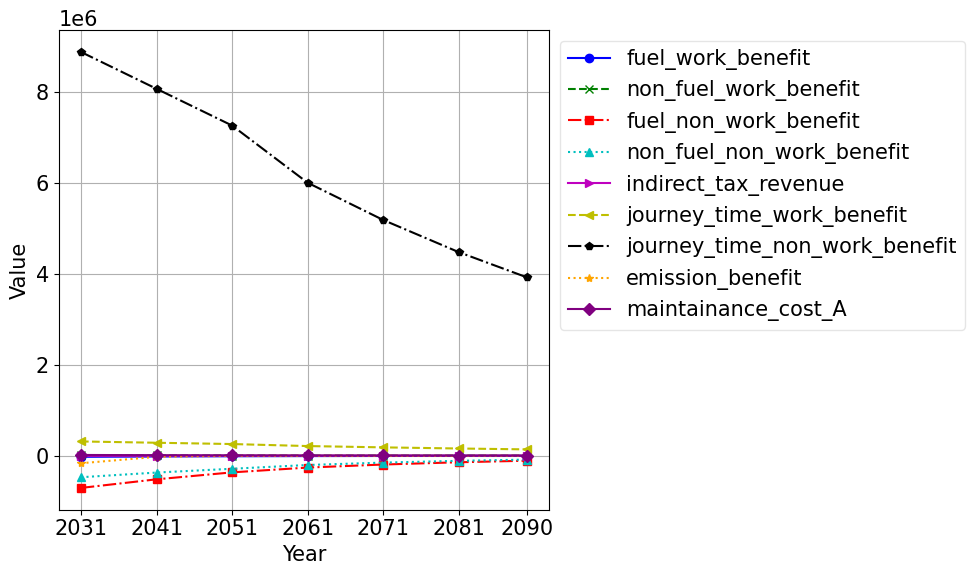

In [3]:
def draw_line_chart(schemeA1):

    costs_benefits = schemeA1.costs_benefits
    data_to_plot_fuel_work = costs_benefits['fuel_work_benefit']
    data_to_plot_non_fuel_work = costs_benefits['non_fuel_work_benefit']
    data_to_plot_fuel_non_work = costs_benefits['fuel_non_work_benefit']
    data_to_plot_non_fuel_non_work = costs_benefits['non_fuel_non_work_benefit']
    data_to_plot_indirect_tax_revenue = costs_benefits['indirect_tax_revenue']
    data_to_plot_journey_time_work_benefit = costs_benefits['journey_time_work_benefit']
    data_to_plot_journey_time_non_work_benefit = costs_benefits['journey_time_non_work_benefit']
    data_to_plot_emission_benefit = costs_benefits['emission_benefit']
    data_to_plot_maintainance_cost = costs_benefits['maintenance_cost_A']

    years =[2031, 2041, 2051, 2061, 2071, 2081, 2090]
    values_plot_fuel_work = [data_to_plot_fuel_work[year] for year in years]
    values_plot_non_fuel_work = [data_to_plot_non_fuel_work[year] for year in years]
    values_plot_fuel_non_work = [data_to_plot_fuel_non_work[year] for year in years]
    values_plot_non_fuel_non_work = [data_to_plot_non_fuel_non_work[year] for year in years]
    values_plot_indirect_tax_revenue = [data_to_plot_indirect_tax_revenue[year] for year in years]
    values_plot_journey_time_work_benefit = [data_to_plot_journey_time_work_benefit[year] for year in years]
    values_plot_journey_time_non_work_benefit = [data_to_plot_journey_time_non_work_benefit[year] for year in years]
    values_plot_emission_benefit = [data_to_plot_emission_benefit[year] for year in years]
    values_plot_maintainance_cost = [data_to_plot_maintainance_cost[year] for year in years]

    plt.figure(figsize=(10, 6))
    plt.plot(years, values_plot_fuel_work, marker='o', linestyle='-', color='b', label='fuel_work_benefit')
    plt.plot(years, values_plot_non_fuel_work, marker='x', linestyle='--', color='g', label='non_fuel_work_benefit')
    plt.plot(years, values_plot_fuel_non_work, marker='s', linestyle='-.', color='r', label='fuel_non_work_benefit')
    plt.plot(years, values_plot_non_fuel_non_work, marker='^', linestyle=':', color='c', label='non_fuel_non_work_benefit')
    plt.plot(years, values_plot_indirect_tax_revenue, marker='>', linestyle='-', color='m', label='indirect_tax_revenue')
    plt.plot(years, values_plot_journey_time_work_benefit, marker='<', linestyle='--', color='y', label='journey_time_work_benefit')
    plt.plot(years, values_plot_journey_time_non_work_benefit, marker='p', linestyle='-.', color='k', label='journey_time_non_work_benefit')
    plt.plot(years, values_plot_emission_benefit, marker='*', linestyle=':', color='orange', label='emission_benefit')
    plt.plot(years, values_plot_maintainance_cost, marker='D', linestyle='-', color='purple', label='maintainance_cost_A')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.xticks(years)
    plt.legend(loc = 'upper left',bbox_to_anchor=(1, 1), framealpha=0.5)  # 添加图例
    plt.tight_layout()
    plt.show()

schemeA1 =  TransportationScheme()
schemeA1.get_things_done()
draw_line_chart(schemeA1)


CSV文件已处理完成并保存为: voc_processed.csv
{'original': {'PVC': 145943436.49927253, 'PVB': 354184656.25286794, 'NPV': 208241219.7535954, 'BCR': 2.426862521183907, 'IRR': 0.07833762681638579, 'FYRR': 0.05364280406433695, 'Payback Period': 20}, 'construciton': {'PVC': 212891904.34927255, 'PVB': 354184656.25286794, 'NPV': 141292751.9035954, 'BCR': 1.6636830664626359, 'IRR': 0.05659607530096089, 'FYRR': 0.03674164661940886, 'Payback Period': 31}, 'time_value': {'PVC': 145943436.49927253, 'PVB': 270369327.5044346, 'NPV': 124425891.00516206, 'BCR': 1.8525624309646997, 'IRR': 0.06080556502827217, 'FYRR': 0.033946338973183984, 'Payback Period': 28}, 'emission': {'PVC': 145943436.49927253, 'PVB': 353711495.27627057, 'NPV': 207768058.77699804, 'BCR': 2.4236204365246237, 'IRR': 0.07817815584589871, 'FYRR': 0.053115589052348124, 'Payback Period': 20}, 'project_life': {'PVC': 145884843.71453822, 'PVB': 270901560.44997597, 'NPV': 125016716.73543775, 'BCR': 1.8569547977174763, 'IRR': 0.07318174269833078, 'FYR

C:\Users\18117\AppData\Local\Temp\ipykernel_30852\628132315.py:67: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


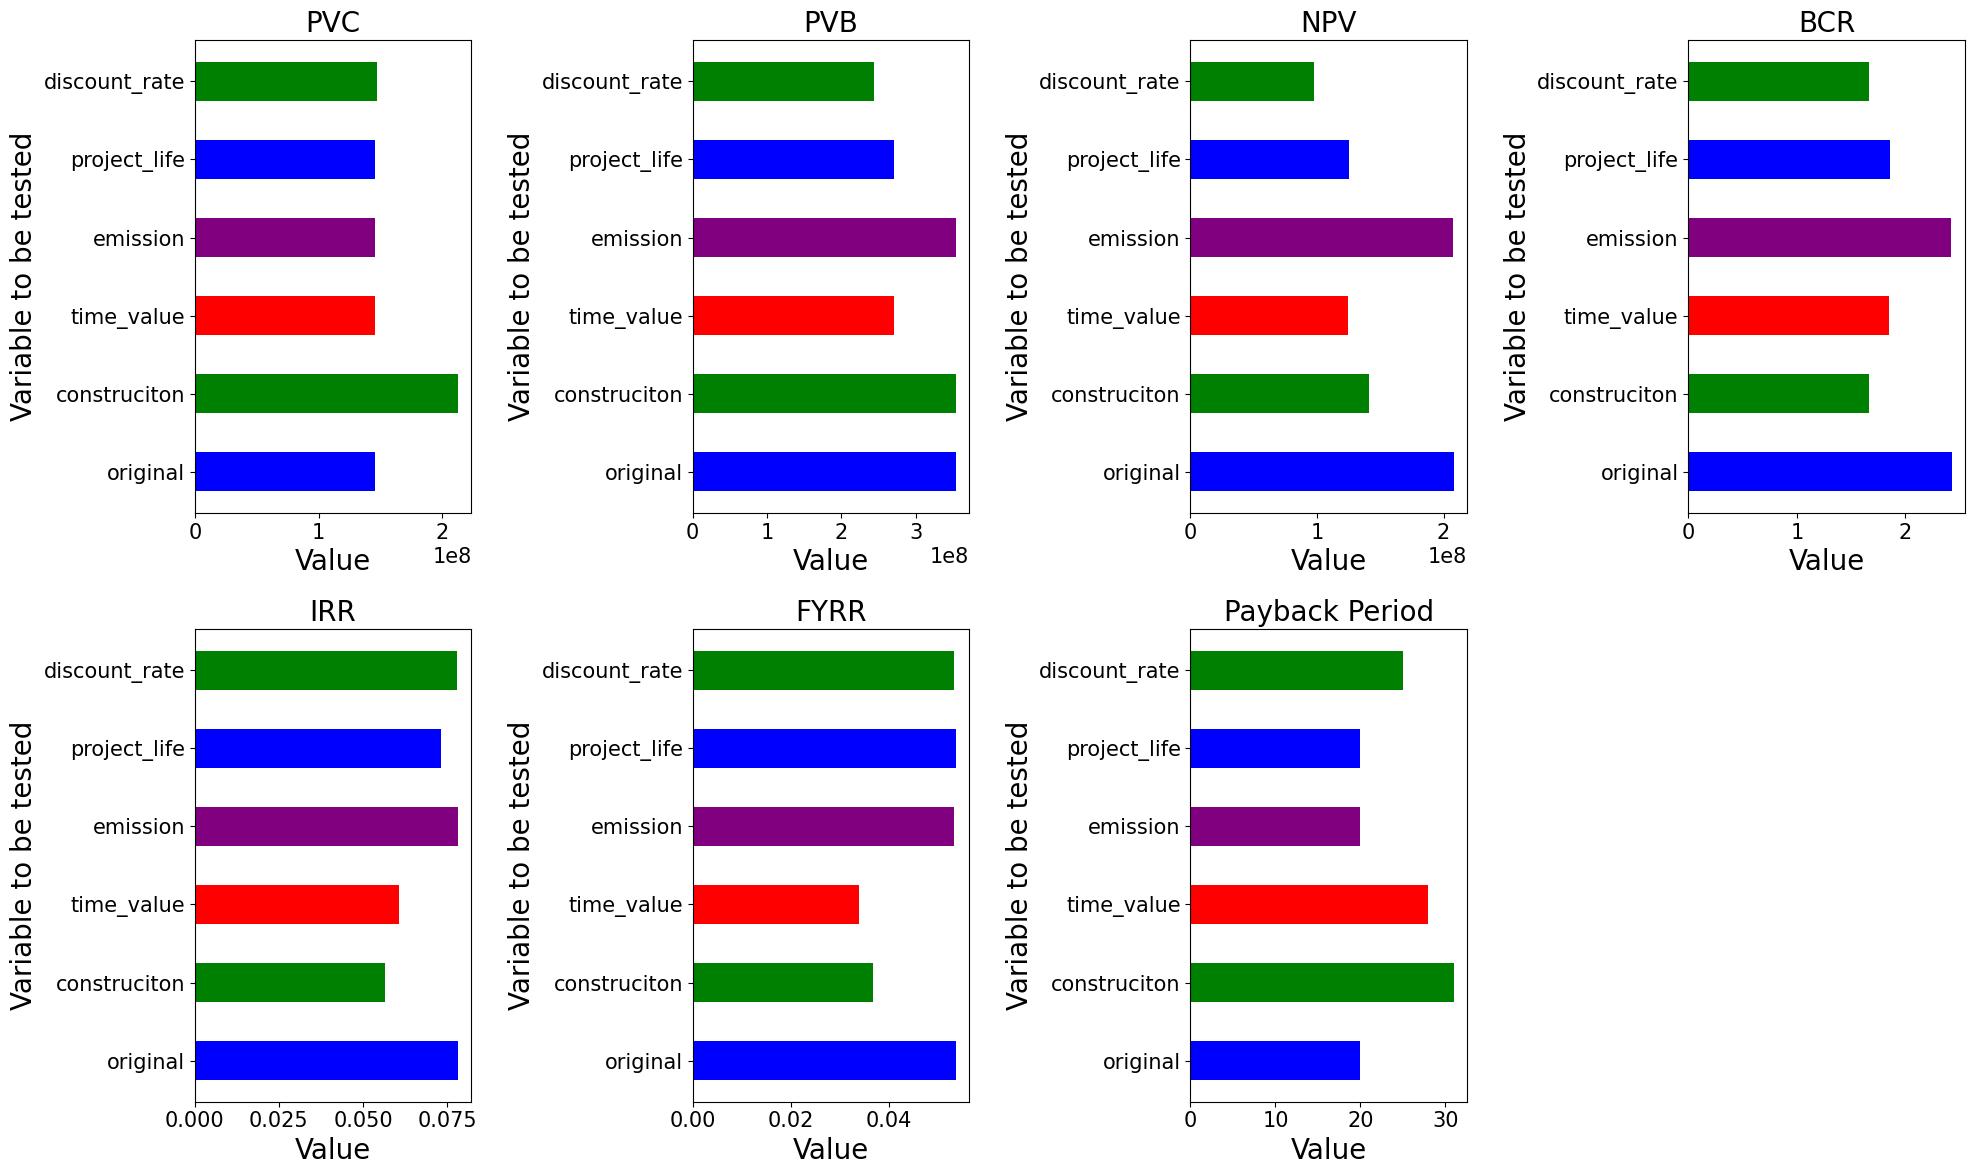

In [4]:
from sensitivity import sensitive_analysis

result_dict = sensitive_analysis()
print(result_dict)
plot_bar_chart(result_dict)
